# Understanding Global COVID-19 Cases
## Eric Oliverio

# Import Data 

In [126]:
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltE

#Load our data
df = pd.read_csv('time_series_covid19_confirmed_global.csv')

df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,22,24,24,40,40,74,84,94
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,55,59,64,70,76,89,104,123,146,174
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,60,74,87,90,139,201,230,264,302,367
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,39,53,75,88,113,133,164,188,224
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,1,2,2,3,3,3,4


In [127]:
 #Let's see the top 10 most infected places as of 3/26
#today = df.shape[1]-
today = len(df.columns)-1
df_top = df.sort_values(df.columns[today], ascending = False)




In [128]:
df_top.head(11)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,6421,7783,13677,19100,25489,33276,43847,53740,65778,83836
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,31506,35713,41035,47021,53578,59138,63927,69176,74386,80589
62,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67799,67800,67800,67800,67800,67800,67800,67801,67801,67801
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,11748,13910,17963,20410,25374,28768,35136,39885,49515,57786
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,9257,12327,15320,19848,22213,24873,29056,32986,37323,43938
133,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,...,16169,17361,18407,19644,20610,21638,23049,24811,27017,29406
116,NaN,France,46.2276,2.2137,0,0,2,3,3,3,...,7652,9043,10871,12612,14282,16018,19856,22304,25233,29155
206,NaN,Switzerland,46.8182,8.2275,0,0,0,0,0,0,...,2700,3028,4075,5294,6575,7474,8795,9877,10897,11811
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,1950,2626,2689,3983,5018,5683,6650,8077,9529,11658
143,NaN,"Korea, South",36.0000,128.0000,1,1,2,2,3,4,...,8320,8413,8565,8652,8799,8961,8961,9037,9137,9241


We can see the U.S. has the most cases, followed by Italy, the Hubei province of China, Spain, Germany, and Iran. 

#### Between provinces/countires/lat/long, there are many locations. We won't look at lat/long data yet so remove those

In [129]:
df.drop(['Lat','Long'], axis=1,inplace=True)

2. Now let's sort out all provinces (these exist for China, Canada, and some territories of France, U.K., Denmark, and the Netherlands)



# China and its provinces
Let's sum up all provinces for each day

In [130]:
#find chinese provences
dc1 = df.loc[df['Country/Region'] == 'China']
dc1.drop(['Country/Region'], axis=1,inplace=True)

#sum the provinces as append/this is what we need
dc1 = dc1.append(dc1.sum(numeric_only=True),ignore_index=True)
dc1.at[33, 'Province/State'] = 'Daily_total'



Hubei was the epicenter, followed by Guangdong, Henen, and Zhejiang

## Top provinces

In [131]:
#This is what we needed
pos_china = dc1.loc[33]

#what provinces were hit the worst?
dc1.sort_values(by=['3/26/20'], ascending=False).head(5)

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
33,Daily_total,548.0,643.0,920.0,1406.0,2075.0,2877.0,5509.0,6087.0,8141.0,...,81058.0,81102.0,81156.0,81250.0,81305.0,81435.0,81498.0,81591.0,81661.0,81782.0
13,Hubei,444.0,444.0,549.0,761.0,1058.0,1423.0,3554.0,3554.0,4903.0,...,67799.0,67800.0,67800.0,67800.0,67800.0,67800.0,67800.0,67801.0,67801.0,67801.0
5,Guangdong,26.0,32.0,53.0,78.0,111.0,151.0,207.0,277.0,354.0,...,1364.0,1370.0,1378.0,1395.0,1400.0,1413.0,1415.0,1428.0,1433.0,1448.0
11,Henan,5.0,5.0,9.0,32.0,83.0,128.0,168.0,206.0,278.0,...,1273.0,1273.0,1273.0,1273.0,1273.0,1274.0,1274.0,1274.0,1274.0,1275.0
32,Zhejiang,10.0,27.0,43.0,62.0,104.0,128.0,173.0,296.0,428.0,...,1232.0,1232.0,1233.0,1234.0,1236.0,1238.0,1238.0,1240.0,1241.0,1243.0


## Reformat/pivot

In [132]:
#reformat
dc1 = dc1.T
new_header = dc1.iloc[0] #grab the first row for the header
dc = dc1[1:] #take the data less the header row
dc.columns = new_header
dc.index.names = ['Date']

dc.head()

Province/State,Anhui,Beijing,Chongqing,Fujian,Gansu,Guangdong,Guangxi,Guizhou,Hainan,Hebei,...,Shandong,Shanghai,Shanxi,Sichuan,Tianjin,Tibet,Xinjiang,Yunnan,Zhejiang,Daily_total
Date,,,,,,,,,,,,,,,,,,,,,
1/22/20,1,14,6,1,0,26,2,1,4,1,...,2,9,1,5,4,0,0,1,10,548
1/23/20,9,22,9,5,2,32,5,3,5,1,...,6,16,1,8,4,0,2,2,27,643
1/24/20,15,36,27,10,2,53,23,3,8,2,...,15,20,1,15,8,0,2,5,43,920
1/25/20,39,41,57,18,4,78,23,4,19,8,...,27,33,6,28,10,0,3,11,62,1406
1/26/20,60,68,75,35,7,111,36,5,22,13,...,46,40,9,44,14,0,4,16,104,2075


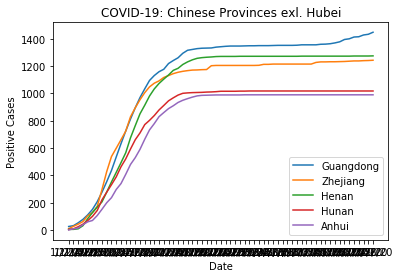

In [133]:
plt.plot(dc.index,dc.Guangdong)
plt.plot(dc.index,dc.Zhejiang)
plt.plot(dc.index,dc.Henan)
plt.plot(dc.index,dc.Hunan)
plt.plot(dc.index,dc.Anhui)
plt.legend(['Guangdong','Zhejiang','Henan','Hunan','Anhui'])
plt.title('COVID-19: Chinese Provinces exl. Hubei')
plt.ylabel('Positive Cases')
plt.xlabel('Date')

plt.show()

# Global Data + China

In [134]:
#Remove provinces/states

def nans(df): 
    return df[df.isnull().any(axis=1)]

### 

In [135]:
df = nans(df)

#add china
df = df.append(pos_china.T,ignore_index=True)
df.at[172, 'Country/Region'] = 'China'
df.drop(['Province/State'], axis=1,inplace=True)

df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,24.0,24.0,40.0,40.0,74.0,84.0,94.0
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.0,59.0,64.0,70.0,76.0,89.0,104.0,123.0,146.0,174.0
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.0,74.0,87.0,90.0,139.0,201.0,230.0,264.0,302.0,367.0
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.0,39.0,53.0,75.0,88.0,113.0,133.0,164.0,188.0,224.0
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Guinea-Bissau,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
169,Mali,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
170,Saint Kitts and Nevis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
171,Kosovo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0


### Reformat/Pivot

In [136]:
#top five values
#Sort top time then Bar plot

#df10 = df.T

#top five values
#Sort top time then Bar plot

today = len(df.columns)-1
df_10 = df.sort_values(df.columns[today],ascending=False)
#df_10 = df
#df_10 = df_10.drop('glo_Positive')
df_ten = df_10.head(6)
df_ten = df_ten.T

new_header = df_ten.iloc[0] #grab the first row for the header
df10 = df_ten[1:] #take the data less the header row
df10.columns = new_header
df10

Country/Region,US,China,Italy,Spain,Germany,Iran
1/22/20,1,548,0,0,0,0
1/23/20,1,643,0,0,0,0
1/24/20,2,920,0,0,0,0
1/25/20,2,1406,0,0,0,0
1/26/20,5,2075,0,0,0,0
...,...,...,...,...,...,...
3/22/20,33276,81435,59138,28768,24873,21638
3/23/20,43847,81498,63927,35136,29056,23049
3/24/20,53740,81591,69176,39885,32986,24811
3/25/20,65778,81661,74386,49515,37323,27017


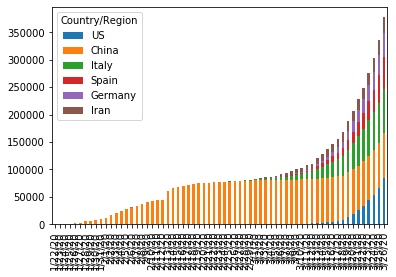

In [137]:
df10.plot.bar(stacked=True);

In [138]:
#Format

dft = df.T

new_header = dft.iloc[0] #grab the first row for the header
df = dft[2:] #take the data less the header row
df.columns = new_header
df.index.names = ['Date']

df.head()



Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Austria,Azerbaijan,...,Timor-Leste,Belize,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Kosovo,China
Date,,,,,,,,,,,,,,,,,,,,,
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,643
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,920
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1406
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2075
1/27/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2877


## Add global positive

In [139]:
#global daily positive

#pos = df.sum(axis=1)
#may also add lat/long
#df.insert(0, 'Positive', pos)

pos = df.sum(axis=1)

#may also sum lat/long
pd.Series(pos)
df.insert(0, 'glo_Positive', pos)

df.head()

Country/Region,glo_Positive,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Austria,...,Timor-Leste,Belize,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Kosovo,China
Date,,,,,,,,,,,,,,,,,,,,,
1/23/20,654.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,643
1/24/20,941.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,920
1/25/20,1434.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1406
1/26/20,2113.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2075
1/27/20,2921.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2877


In [180]:
import matplotlib.dates as mdates
import datetime

#x_values = [datetime.datetime.strptime(d,"%m/%dd/%yy").date() for d in df.index]
[datetime.datetime.strptime(x,'%d/%m/%y').strptime('%d/%m/%y') for x in df.index]
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 

plt.plot(df.index,df.glo_Positive)
plt.plot(df.index,df.China)


plt.title('COVID-19: Global')
plt.ylabel('Positive Cases')
plt.xlabel('Date')

ax.xaxis.set_major_locator(mdates.DayLocator(interval=60))  

plt.show()


ValueError: time data '1/23/20' does not match format '%d/%m/%y'

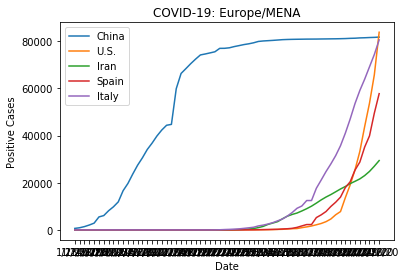

In [141]:

plt.plot(df.index,df.China)
plt.plot(df.index,df.US)
plt.plot(df.index,df.Iran)
plt.plot(df.index,df.Spain)
plt.plot(df.index,df.Italy)
plt.legend(['China','U.S.','Iran','Spain','Italy'])
plt.title('COVID-19: Europe/MENA')
plt.ylabel('Positive Cases')
plt.xlabel('Date')

plt.show()

# Now 

Text(0.5, 0, 'Date')

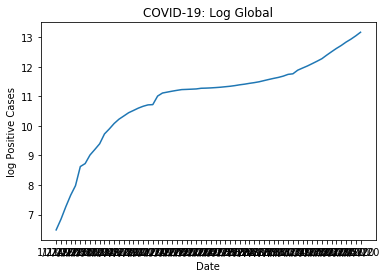

In [142]:
plt.plot(df.index,np.log(df.glo_Positive))
plt.title('COVID-19: Log Global')
plt.ylabel('log Positive Cases')
plt.xlabel('Date')